In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataprep.eda import create_report
import seaborn as sns

In [56]:
df = pd.read_csv('./Fish.csv')

In [57]:
#report = create_report(df, title = 'Fish report')

In [58]:
#report.show_browser()

In [59]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

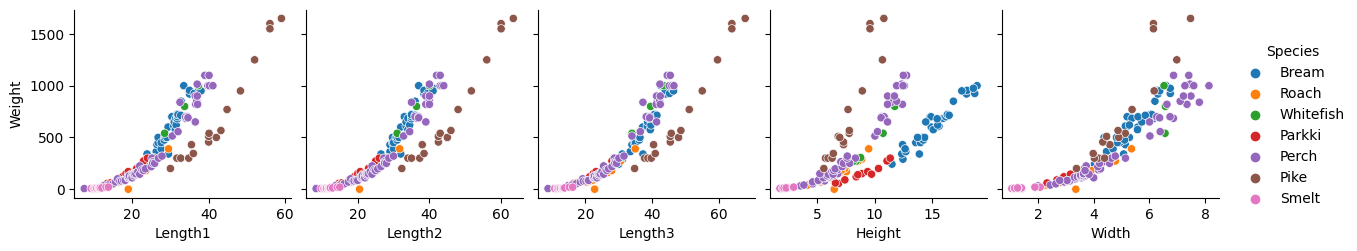

In [60]:

sns.pairplot(data= df,
             x_vars = ['Length1','Length2','Length3','Height','Width'],
             y_vars = 'Weight', 
             hue = 'Species')

In [61]:
df = df.drop(columns = ['Length2', 'Length3'])

In [62]:
df['Species'] = df['Species'].replace(['Perch','Bream','Roach','Pike','Smelt','Parkki','Whitefish'],[1,2,3,4,5,6,7])

In [63]:
df['Species']

0      2
1      2
2      2
3      2
4      2
      ..
154    5
155    5
156    5
157    5
158    5
Name: Species, Length: 159, dtype: int64

In [64]:
df.describe()

,Species,Weight,Length1,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,2.716981,398.326415,26.247170,8.970994,4.417486
std,1.804117,357.978317,9.996441,4.286208,1.685804
min,1.000000,0.000000,7.500000,1.728400,1.047600
25%,1.000000,120.000000,19.050000,5.944800,3.385650
50%,2.000000,273.000000,25.200000,7.786000,4.248500
75%,4.000000,650.000000,32.700000,12.365900,5.584500
max,7.000000,1650.000000,59.000000,18.957000,8.142000


In [65]:
df.to_csv('clean_fish.csv')

In [66]:
#df.drop([142,143,144], axis=0, inplace=True)

In [67]:
y = df['Weight'].to_numpy()
m = len(y)

In [68]:
x = df.drop(columns=['Weight'])
x.columns


Index(['Species', 'Length1', 'Height', 'Width'], dtype='object')

In [69]:
x = np.c_[np.ones((len(x),1)), x]

In [70]:
teta = np.random.randn(5)
teta

array([ 0.76040231,  0.84551777,  0.46526478,  1.42430161, -1.07834561])

In [71]:
# Funcion para calcular el costo de una regresion lineal multivariable
# 1/2m * sumatoria((y_hat - y)**2)
def Costo(x, y, teta):
    y_hat = x.dot(teta)
    errores = np.subtract(y_hat, y)
    # J = costo de la regresion
    J = 1 / (m) * np.sum(np.square(errores))
    return J

In [72]:
def GradienteDescediente(x, y, teta, alfa, epocas):
    historialCostos = np.zeros(epocas)
    
    for i in range(epocas):
        y_hat = x.dot(teta)
        error =np.subtract(y_hat, y)
        delta = (2/m) * x.transpose().dot(error)
        teta = teta - alfa * delta
        historialCostos[i] = Costo(x,y,teta)

    return teta, historialCostos


In [73]:
#alfa = float(input("Learning rate:"))
#epocas = int(input("Epocas: "))
alfa = .00002
epocas = 100

In [74]:
teta, historialCostos = GradienteDescediente(x, y, teta, alfa, epocas)

In [75]:
teta

array([ 1.04303464,  1.4596957 , 12.55275402,  5.58577863,  0.95057591])

In [76]:
historialCostos[-1]

52870.02908293826

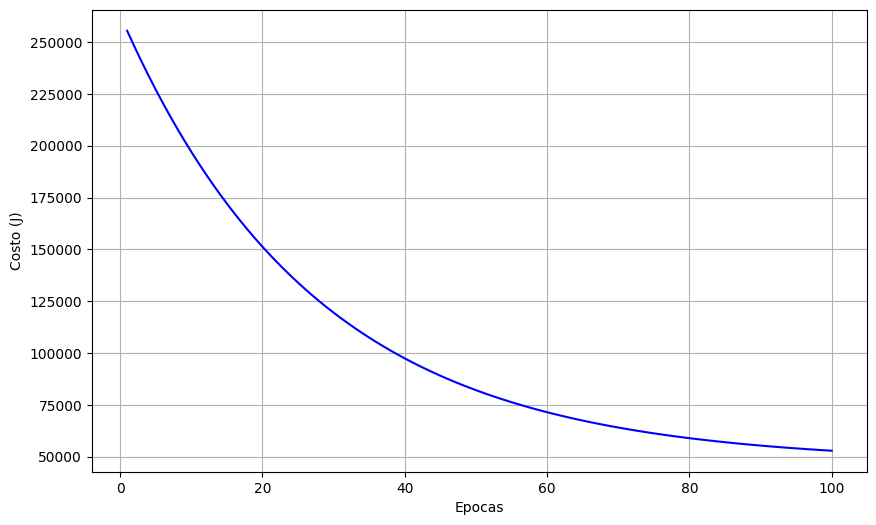

In [77]:
plt.plot(range(1, epocas + 1), historialCostos, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Epocas")
plt.ylabel("Costo (J)")
plt.show()

In [78]:
while historialCostos[-1] > 10:
    teta, historialCostos = GradienteDescediente(x, y, teta, alfa, epocas)
    print(historialCostos[-1])

47215.44758374445
46864.23259035333
46654.27383624066
46451.834601284376
46253.36891055566
46058.703585434916
45867.754765662095
45680.442840067226
45496.690188589026
45316.42107019133
45139.5615681171
44966.03953833968
44795.78455974682
44628.72788595839
44464.802398717235
44303.942562795804
44146.08438236266
43991.165358756494
43839.12444961587
43689.90202931618
43543.43985066628
43399.68100781975
43258.569900356866
43120.05219849585
42984.07480939251
42850.585844490335
42719.53458788299
42590.871465654025
42464.5480161591
42340.5168612177
42218.731678182376
42099.147172855155
41981.71905322127
41866.40400397232
41753.1596617912
41641.94459137278
41532.718262155126
41425.44102573674
41320.07409395681
41216.57951761551
41114.920165813244
41015.059705887485
40916.96258392738
40820.594005846964
40725.91991899787
40632.906994304285
40541.52260890239
40451.73482926782
40363.51239481524
40276.824701954574
40191.641788588895
40107.934319039785
40025.67356938658
39944.83141320567
39865.38030

KeyboardInterrupt: 

In [ ]:
historialCostos[-1]

14680.438484743941

In [ ]:
teta

array([-553.8209441 ,   10.28350163,   21.49769466,   12.77335027,
         55.55779587])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.score(x,y), lin_reg.intercept_, lin_reg.coef_

(0.8847173803467854,
 -554.7493654880126,
 array([ 0.        , 10.385978  , 21.49212628, 12.763642  , 55.74375566]))